In [2]:
# execute to import notebook styling for tables and width etc.
from IPython.core.display import HTML
import urllib.request
response = urllib.request.urlopen('https://raw.githubusercontent.com/DataScienceUWL/DS775v2/master/ds755.css')
HTML(response.read().decode("utf-8"));

In [273]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<font size=18>Lesson 08 Homework</font>

<font color="red">This homework is incomplete.  A bit more should be added soon (more than a week before Lesson 8 week).</font>

### Textbook Problem 20.2 (b)

The weather can be considered a stochastic system, because it evolves in a probabilistic manner from one day to the next. Suppose for a certain location that this probabilistic series satisfies the following description:

The probability of rain tomorrow is 0.6 if it is raining today. The probability of its being clear (no rain) tomorrow is 0.8 if it is clear today.

(b) Now use a computer with the uniform random numbers generated by NumPy in Python to simulate the pattern of the weather for 10 days, beginning the day after a clear day.

In [62]:
np.random.seed(10)
forecast = {}
rain_today = 0

for i in range(10):
    if i > 0:
        rain_today = np.random.randint(2, size=1)[0]
            
    if rain_today == 1:
        rain_tomorrow = 0.6
    
    elif rain_today == 0:
        rain_tomorrow = 1 - 0.8
    
    day = f"day {i+1}"
    forecast[day] = round(rain_tomorrow,2)

print("Forecast of rain tomorrow:")
print(forecast)

Forecast of rain tomorrow:
{'day 1': 0.2, 'day 2': 0.6, 'day 3': 0.6, 'day 4': 0.2, 'day 5': 0.6, 'day 6': 0.2, 'day 7': 0.6, 'day 8': 0.6, 'day 9': 0.2, 'day 10': 0.6}


### Textbook Problem 20.6-7

Now that Jennifer is in middle school, her parents have decided that they really must start saving for her college education. They have \\$10,000 to invest right now. Furthermore, they plan to save another $4,000 each year until Jennifer starts college five years from now. They plan to split their investment evenly between a stock fund and a bond fund. Historically, the stock fund has had an average annual return of 8 percent with a standard deviation of 6 percent. The bond fund has had an average annual return of 4 percent with a standard deviation of 3 percent. (Assume a normal distribution for both.)
Assume that the initial investment (\\$10,000) is made right now (year 0) and is split evenly between the two funds (i.e., \\$5,000 in each fund). The returns of each fund are allowed to accumulate (i.e., are reinvested) in the same fund and no redistribution will be done before Jennifer starts college. Furthermore, four additional investments of \\$4,000 will be made and split evenly between both funds (\\$2,000 each) at the end of year 1, year 2, year 3, and year 4, plus another \\$4,000 of savings will be available at the end of year 5, just in time for Jennifer to begin college. Use a 1000-trial simulation to estimate each of the following.

(a) What will be the expected value (mean) of the college fund
at the end of year 5?

(b) What will be the standard deviation of the college fund at the
end of year 5?

(c) What is the probability that the college fund at the end of year
5 will be at least \\$35,000?

(d) What is the probability that the college fund at the end of year
5 will be at least \\$40,000?

In [292]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt

sim_size = 1000
college_fund = np.zeros(sim_size)

for i in range(sim_size):
    stock_fund, bond_fund = 5000, 5000
    
    for j in range(0,5):
        # stock/bond returns
        stock_returns = np.mean(np.random.normal(loc=8,scale=6,size=100))
        bond_returns = np.mean(np.random.normal(loc=4,scale=3,size=100))
        stock_i = (1 + (stock_returns/100))
        bond_i = (1 + (bond_returns/100))

        # increment funds
        stock_fund = (stock_fund * stock_i) + 2000
        bond_fund = (bond_fund * bond_i) + 2000
    
    college_fund[i] = stock_fund + bond_fund
    stock_fund, bond_fund = 0, 0
    
mean_fund = round(np.mean(college_fund),2)
std_fund = round(np.std(college_fund),2)
greater_than_35k = len(np.where(college_fund >= 35000)[0])/len(college_fund)
greater_than_40k = len(np.where(college_fund >= 40000)[0])/len(college_fund)

In [293]:
print(f"""mean of college fund: {mean_fund}
std of college fund: {std_fund}
prob greater than 35k: {greater_than_35k}
prob greater than 40k: {greater_than_40k}""")

mean of college fund: 35996.55
std of college fund: 177.09
prob greater than 35k: 1.0
prob greater than 40k: 0.0


### Textbook Problem 20.6-9

Road Pavers, Inc. (RPI) is considering bidding on a county road construction project. RPI has estimated that the cost of this particular project would be \\$5 million. In addition, the cost of putting together a bid is estimated to be \\$50,000. The county also will receive four other bids on the project from competitors of RPI. Past experience with these competitors suggests that each competitor’s bid is most likely to be 20 percent over the project cost of \\$5 million, but could be as low as 5 percent over or as much as 40 percent over this cost. Assume a triangular distribution for each of these bids.

(a) Suppose that RPI bids \\$5.7 million on the project. Perform 1,000 trials of a simulation. What is the probability that RPI will win the bid? What is RPI’s mean profit?

(b) Generate a parameter analysis report to consider eight possible bids between \\$5.3 million and $6 million in order to forecast RPI’s mean profit for each bid. Which of these bids maximizes RPI’s mean profit?

(c) Generate a trend chart for the eight bids considered in part b.

(d) Perform an automated search to find the bid that maximizes RPI’s mean profit.

In [352]:
num_competitors = 4
project_cost = 5000000 + 50000
rpi_bid = 5700000

possible_bids = np.arange(5.3,6,0.1)*1000000

def bid_sim(rpi_bid, project_cost = 5050000, num_competitors = 4):
    lowest_bids = np.empty(sim_size)
    winners = np.empty(sim_size, dtype = np.object)
    competitor_bids = np.zeros(num_competitors)
    
    for i in range(sim_size):
        for j in range(num_competitors):
            competitor_bid_rate = np.random.triangular(2, 20, 40)
            competitor_bids[j] = project_cost * (1+(competitor_bid_rate/100))

        min_comp_bid = min(competitor_bids)
        lowest_bid = min(rpi_bid, min_comp_bid)

        if lowest_bid == rpi_bid:
            winners[i] = "rpi"
            lowest_bids[i] = rpi_bid
        else:
            winners[i] = np.argmin(competitor_bids)
            lowest_bids[i] = min_comp_bid

    rpi_winners = np.where(winners == 'rpi')[0]

    prob_rpi = len(rpi_winners)/len(winners)
    rpi_profit = rpi_bid - project_cost
    mean_profit = np.mean(lowest_bids) - project_cost
    profit_retainer = round(rpi_profit * prob_rpi,3)

    return prob_rpi, rpi_profit, profit_retainer

In [353]:
possible_bids = np.arange(5.3,6,0.1)*1000000
mean_profit = np.zeros(len(possible_bids))
probabilities = np.zeros(len(possible_bids))
profit_retainer_ls = np.zeros(len(possible_bids))

for k, bid in enumerate(possible_bids):
    probabilities[k], mean_profit[k], profit_retainer_ls[k] = bid_sim(bid, project_cost, num_competitors)

# profit_retainer = probabilities*mean_profit
# profit_retainer = np.round(profit_retainer,3)

df = pd.DataFrame({
    'Bid': possible_bids,
    'RPI_Prob': probabilities,
    'RPI_Profit': mean_profit,
    'Profit_retainer': profit_retainer_ls
})
df

,Bid,RPI_Prob,RPI_Profit,Profit_retainer
0,5300000.0,0.958,250000.0,239500.0
1,5400000.0,0.854,350000.0,298900.0
2,5500000.0,0.742,450000.0,333900.0
3,5600000.0,0.611,550000.0,336050.0
4,5700000.0,0.458,650000.0,297700.0
5,5800000.0,0.357,750000.0,267750.0
6,5900000.0,0.202,850000.0,171700.0
7,6000000.0,0.110,950000.0,104500.0


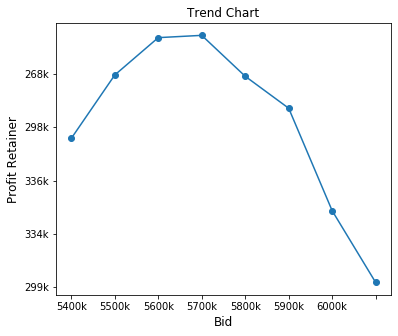

In [354]:
fig, ax = plt.subplots(figsize=(6, 5))
ax.plot('Bid','Profit_retainer',data=df, linestyle='-', marker='o');
ax.set_xticklabels([str(round(bid/1000)) + "k" for bid in df.iloc[:,0].tolist()])
ax.set_yticklabels([str(round(profit/1000)) + "k" for profit in df.iloc[:,3].tolist()])
plt.xlabel('Bid', fontsize=12);
plt.ylabel('Profit Retainer', fontsize=12);
plt.title("Trend Chart");

In [358]:
# find maximum average profit
# results will vary slightly on each run
import babel.numbers as numbers
from scipy.optimize import minimize_scalar

# to maximize we minimize the negative profit
def neg_mean_profit(bid):
    return(-bid_sim(bid)[2]) # simulate stats and return just mean

result = minimize_scalar(neg_mean_profit,bounds=[5050000,7000000],method='bounded')

# summarize results
print(f"Maximum mean profit is: ${numbers.format_decimal(round(-result['fun']))}")
print(f"And occurs at a bid of ${numbers.format_decimal(round(result['x']))}")

Maximum mean profit is: $346,234
And occurs at a bid of $5,557,675
